<a href="https://colab.research.google.com/github/Droganderon/Colab/blob/main/Lab%2003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Лабораторная работа №3 "Ансамбли моделей на примере решающих деревьев"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**1.** Разбить выборку на две части (train, test)

In [3]:
a = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True).to_numpy()
b = pd.get_dummies(df['ChestPainType']).to_numpy()
c = pd.get_dummies(df['Sex']).to_numpy()
d = pd.get_dummies(df['RestingECG']).to_numpy()
e = pd.get_dummies(df['ExerciseAngina']).to_numpy()
f = pd.get_dummies(df['ST_Slope']).to_numpy()
df['ChestPainType'] = b.argmax(1)
df['Sex'] = c.argmax(1)
df['RestingECG'] = d.argmax(1)
df['ExerciseAngina'] = e.argmax(1)
df['ST_Slope'] = f.argmax(1)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [4]:
from sklearn.model_selection import train_test_split
Y = df.pop('FastingBS')
X_train, X_test, Y_train, Y_test= train_test_split(df, Y, train_size=0.75, test_size=0.25, stratify=Y, random_state=123)
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
737,57,1,0,152,274,1,88,1,1.2,1,1
886,52,1,2,138,223,1,169,0,0.0,2,0
896,47,1,2,130,253,1,179,0,0.0,2,0
169,58,1,2,140,179,1,160,0,0.0,2,0
540,62,1,2,138,204,2,122,1,1.2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
626,53,1,0,142,226,0,111,1,0.0,2,0
907,44,1,0,120,169,1,144,1,2.8,0,1
62,45,1,0,140,224,1,144,0,0.0,2,0
531,64,1,0,143,306,2,115,1,1.8,1,1


In [5]:
Y_train

737    0
886    0
896    0
169    0
540    0
      ..
626    0
907    0
62     0
531    1
866    0
Name: FastingBS, Length: 688, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split



**2.** С помощью простого решающего дерева (см. класс sklearn.tree.DecisionTreeClassifier()). Обучить модель, не задавая ограничения на глубину решающего дерева, оценить точность обучения и тестирования (здесь в качестве точности использовать долю верных ответов). Сравнить точность на обучающей и тестовой выборке, что можно сказать о модели?

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf_1 = clf.fit(X_train, Y_train)
clf_2 = clf.fit(X_test, Y_test)


In [29]:
Y_pred_1 = clf_1.predict(X_train)
Y_pred_2 = clf_2.predict(X_test)

score_1 = accuracy_score(Y_train, Y_pred_1)
score_2 = accuracy_score(Y_test, Y_pred_2)

score_1, score_2

(0.6947674418604651, 1.0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



Train accuracy: 1.000, Test accuracy: 0.774


**3.** C помощью класса sklearn.model_selection.GridSearchCV() выполнить оптимизацию решающего дерева по гиперпараметрам: 
* 'max_depth': [3,4,5,6,7,8,9,10,None],
* 'max_features':  ['auto', 'log2', None], 
* 'min_samples_leaf': range(1,10), 
* 'min_samples_split': range(2, 10), 
* 'criterion': ['gini', 'entropy']  
Гиперпараметры можно представить в виде словаря и передать их в качестве параметра param_grid при создании экземпляра класса GridSearchCV(). В качестве scoring задать 'accuracy', количество фолдов задать равным 5.

In [ ]:
from sklearn.model_selection import GridSearchCV

list_param = {'max_depth': [3,4,5,6,7,8,9,10,None], 'max_features': ['auto', 'log2', None], 'min_samples_leaf': range(1,10), 'min_samples_split': range(2, 10), 'criterion': ['gini', 'entropy']}
grid = GridSearchCV(clf, list_param, scoring='accuracy', cv=5)
logreg_cv = grid.fit(X_train, Y_train)

In [15]:
logreg_cv

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy')

In [ ]:
from sklearn.model_selection import GridSearchCV

list_param = {}


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=2,
                                              random_state=13),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, None],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy')

**3.1** Вывести оптимальные параметры модели и ее точность (смотрите среди перечня атрубутов класса)

In [17]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [18]:
grid.best_score_

0.7921612186607426

criterion: gini
max_depth: 10
max_features: None
min_samples_leaf: 9
min_samples_split: 2


Best score: 0.847


**4.** Обучите новое дерево, задавая оптимальные параметры, полученные в п.3. Оцените точность на обучающей и тестовой выборкой, сравните их с точностью первой модели. Как изменилось качество модели?

In [22]:
clf_new = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2', min_samples_leaf=6, min_samples_split=2)
clf_3 = clf_new.fit(X_train, Y_train)
clf_4 = clf_new.fit(X_test, Y_test)

In [23]:
Y_pred_3 = clf_3.predict(X_train)
Y_pred_4 = clf_4.predict(X_test)

score_3 = accuracy_score(Y_train, Y_pred_3)
score_4 = accuracy_score(Y_test, Y_pred_4)

score_3, score_4

(0.7688953488372093, 0.7739130434782608)

Train accuracy: 0.887, Test accuracy: 0.835


**5.** Визуализируйте полученное дерево решений 

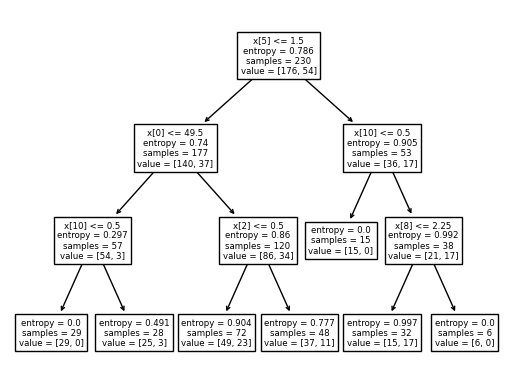

In [31]:
from sklearn.tree import plot_tree
Tree_decision = plot_tree(clf_3)

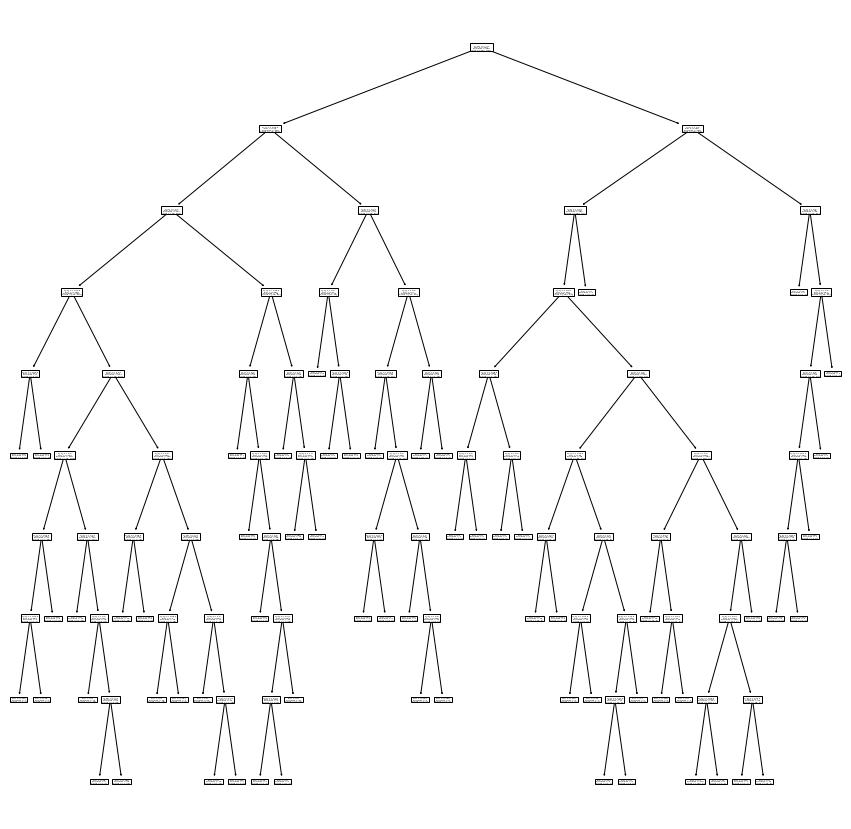

In [ ]:
from sklearn.tree import plot_tree



**7.** Рассчитайте значение roc_auc_score

In [47]:
from sklearn.metrics import roc_auc_score
pred_prob1 = clf_new.predict_proba(X_test)
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
auc_score1

0.7596801346801347

roc auc Test: 0.867


**8.** Определите важность признаков.

In [52]:
importance = clf_new.feature_importances_
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.32797
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.02583
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.05929
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.17625
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.41066


In [56]:
feature_importances = (clf_new.feature_importances_ / sum(clf_new.feature_importances_))
feature_importances.sort()
feature_importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02582551, 0.05929178, 0.17625101, 0.32796869,
       0.41066302])

Feature 0: 0.00984
Feature 6: 0.01258
Feature 3: 0.01394
Feature 5: 0.04165
Feature 1: 0.04412
Feature 9: 0.04576
Feature 2: 0.05422
Feature 8: 0.05712
Feature 4: 0.06265
Feature 7: 0.08897
Feature 10: 0.56915


**8.** На основе процедуры бэггинга обучить композицию решающих деревьев, провести оптимизацию модели по гиперпараметру - кол-во деревьев в ансамбле. Использовать классы BaggingClassifier() и GridSearchCV(). Определить оптимальное кол-во деревьев и оценить точность модели.

In [62]:
from sklearn.ensemble import BaggingClassifier
clf_bagging = BaggingClassifier(clf_new).fit(X_train, Y_train)
clf_bagging.predict




<bound method BaggingClassifier.predict of BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=3,
                                                   max_features='log2',
                                                   min_samples_leaf=6))>

In [ ]:
list_param = {'max_depth': [3,4,5,6,7,8,9,10,None], 'max_features': ['auto', 'log2', None], 'min_samples_leaf': range(1,10), 'min_samples_split': range(2, 10), 'criterion': ['gini', 'entropy']}
grid = GridSearchCV(clf, list_param, scoring='accuracy', cv=5)
logreg_cv = grid.fit(X_train, Y_train)

In [ ]:
from sklearn.ensemble import BaggingClassifier



max_features: 5
n_estimators: 4
Train accuracy: 0.942, Test accuracy: 0.822


**9.** Построить ансамбль решающих деревьев в виде случайного леса (см. класс sklearn.ensemble.RandomForestClassifier()), провести оптимизацию модели по гиперпараметрам: 'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'bootstrap'

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier()
forest_1 = clf_forest.fit(X_train, Y_train)
forest_1.score

<bound method ClassifierMixin.score of RandomForestClassifier()>

In [ ]:
from sklearn.ensemble import RandomForestClassifier



bootstrap: true
max_depth: 3
min_samples_leaf: 5
min_samples_split: 5
n_estimators: 5
Train accuracy: 0.866, Test accuracy: 0.835


**10.** Для всех моделей рассчитать метрики качества (accuracy, precision, recall, F1-score) на тестовой выборке. результат представить в виде датафрейма (например явняе индексы строк - вид модели, столбцы - вид метрики)

In [ ]:


def score(y, y_pred):
    return 
  


,Accuracy,Precision,Recall,F1 score
Decision tree,0.834783,0.856000,0.84252,0.849206
Bagging,0.821739,0.898148,0.76378,0.825532
Random forest,0.834783,0.829630,0.88189,0.854962
